In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

credit = np.genfromtxt("../data/german_credit.csv", delimiter=",", skip_header=True)
dataAmmount = np.shape(credit)[0]

creditability = credit[:, 0]


features = credit[:, 1:]
features_min = np.min(features, axis=0)
features_max = np.max(features, axis=0)
features_nrm = (features - features_min) / (features_max - features_min)




In [12]:
testdata = 0.1
traindata = 1 - testdata

iterations = 1000
learning_rate = 0.03

#generate random parameters for each feature (column)
def parameters(data, seed):
    np.random.seed(seed)
    return np.random.rand(data.shape[1])

#calculate the prediction for each row
def hypothesis (x, coefficients):
    return np.matmul(x, coefficients)

#def loss_function(predictions, target):
#    return return -np.mean(target * np.log(predictions) + (1 - target) * np.log(1 - predictions))

bias = np.random.randn()
prediction_rates = np.empty(iterations);

#TODO 1: linear Regression for Credit
theta = parameters(features_nrm, 1)
for i in range(iterations):
        h = hypothesis(features_nrm, theta)
        binary_h = np.where(h > 0.5, 1, 0)
        prediction_error = np.sum(np.abs(binary_h - creditability))
        prediction_rate = (np.shape(creditability)[0] - prediction_error) / np.shape(creditability)[0] * 100
        prediction_rates[i] = prediction_rate
        diff = h - creditability

        theta_delta = np.matmul(features_nrm.T, diff)
        theta_delta_nrm = learning_rate / np.shape(features_nrm)[0] * theta_delta
        theta = np.subtract(theta, theta_delta_nrm)


        #TODO fix the stopping condition
        # sum_of_abs_changes = np.sum(np.abs(theta_delta_nrm))
        # if sum_of_abs_changes < 0.0001:
        #     theta = parameters(features_nrm, i)
        #     break

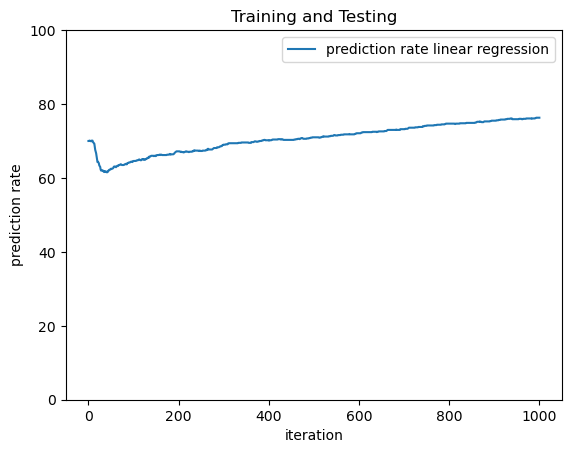

In [13]:
x = np.linspace(0, iterations, iterations)
plt.ylim(0, 100)

plt.plot(x,prediction_rates, label='prediction rate linear regression')

plt.xlabel('iteration')
plt.ylabel('prediction rate')
plt.title('Training and Testing')
plt.legend()

In [14]:
#TODO 2: logistic Regression for Credit

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hypothesisSigmoid (x, coefficients):
    return sigmoid(np.matmul(x, coefficients))

theta = parameters(features_nrm, 1)
for i in range(iterations):
        h = hypothesisSigmoid(features_nrm, theta)
        binary_h = np.where(h > 0.5, 1, 0)
        prediction_error = np.sum(np.abs(binary_h - creditability))
        prediction_rate = (np.shape(creditability)[0] - prediction_error) / np.shape(creditability)[0] * 100
        prediction_rates[i] = prediction_rate
        diff = h - creditability

        theta_delta = np.matmul(features_nrm.T, diff)
        theta_delta_nrm = learning_rate / np.shape(features_nrm)[0] * theta_delta
        theta = np.subtract(theta, theta_delta_nrm)

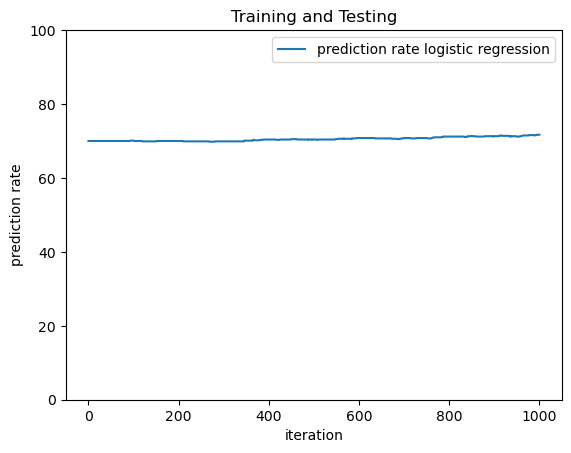

In [15]:
x = np.linspace(0, iterations, iterations)
plt.ylim(0, 100)

plt.plot(x,prediction_rates, label='prediction rate logistic regression')

plt.xlabel('iteration')
plt.ylabel('prediction rate')
plt.title('Training and Testing')
plt.legend()

In [25]:
#TODO 3: split Data in Train and Test
from sklearn.model_selection import train_test_split

credit_0 = credit[credit[:, 0] == 0]
credit_1 = credit[credit[:, 0] == 1]


credit_0_test_i = np.random.choice(credit_0.shape[0], size=50, replace=False)
credit_0_train_i = np.setdiff1d(np.arange(credit_0.shape[0]), credit_0_test_i)

credit_1_test_i = np.random.choice(credit_1.shape[0], size=50, replace=False)
credit_1_train_i = np.setdiff1d(np.arange(credit_1.shape[0]), credit_1_test_i)

credit_train_i = np.concatenate((credit_0_train_i, credit_1_train_i))
credit_test_i = np.concatenate((credit_0_test_i, credit_1_test_i))

credit_test = credit[credit_test_i]
credit_train = credit[credit_train_i]


ft_train = credit_train[:, 1:]
ft_test = credit_test[:, 1:]

ft_train = (ft_train - features_min) / (features_max - features_min)
ft_test = (ft_test - features_min) / (features_max - features_min)

creditability_test = credit_test[:, 0]
creditability_train = credit_train[:, 0]

train_size = ft_train.shape[0]
test_size = creditability_train.shape[0]

train_prediction_rates = np.empty(iterations)
test_prediction_rates = np.empty(iterations)

theta = parameters(ft_train, 1)
for i in range(iterations):
    h_train = hypothesis(ft_train, theta)
    binary_h_train = np.where(h_train > 0.5, 1, 0)
    train_prediction_error = np.sum(np.abs(binary_h_train - creditability_train))
    train_prediction_rate = (train_size - train_prediction_error) / train_size * 100
    train_prediction_rates[i] = train_prediction_rate
    diff = h_train - creditability_train

    theta_delta = np.matmul(ft_train.T, diff)
    theta_delta_nrm = learning_rate / train_size * theta_delta
    theta = np.subtract(theta, theta_delta_nrm)

    # Calculate prediction rate for the test set
    h_test = hypothesis(ft_test, theta)
    binary_h_test = np.where(h_test > 0.5, 1, 0)
    test_prediction_error = np.sum(np.abs(binary_h_test - creditability_test))
    test_prediction_rate = (test_size - test_prediction_error) / test_size * 100
    test_prediction_rates[i] = test_prediction_rate


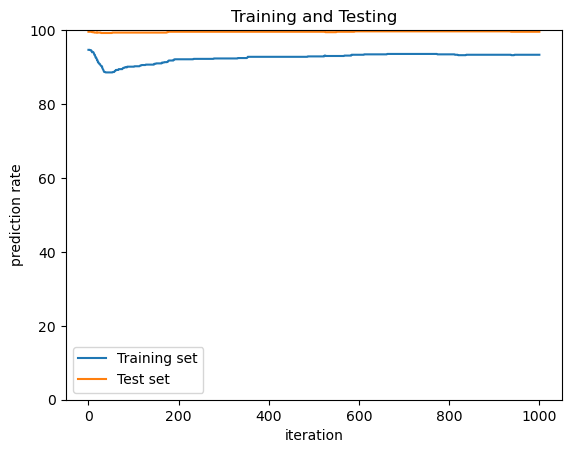

In [26]:

x = np.linspace(0, iterations, iterations)
plt.ylim(0, 100)

#plt.plot(x,prediction_rates, label='prediction rate regression')

plt.plot(x, train_prediction_rates, label='Training set')
plt.plot(x, test_prediction_rates, label='Test set')


plt.xlabel('iteration')
plt.ylabel('prediction rate')
plt.title('Training and Testing')
plt.legend()